# Лабораторная работа №1 по дисциплине "Математические методы цифровой обработки сигналов"

# Тема: Частотный конвертер

#### Выполнил магистрант гр. 9385 Семенов Александр.

## Постановка задачи
**Входные данные:** дискретный сигнал $x$ с частотой дискретизации $N_1=48000$ Гц

**Задача:** преобразовать сигнал $x$ в сигнал $y$ с частотой дискретизации $N_2=16000$ Гц

## Выполнение работы

Чтение аудио-файла:

In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio

x, N1 = librosa.load("03-01-05-01-01-01-15_A15.wav")
N2 = 16000
Audio(x, rate = N1)

### 1. Растяжение:

Растянем сигнал $x$ до сигнала $\hat{x}$ по правилу:

$\displaystyle{ \hat{x}(i) =
  \begin{cases}
    \displaystyle{x\bigg( \frac{i}{N_2} \bigg)}, & i\;делится\;на\;N_2 \\
    0, & при\;остальных\;i \in \mathbb{Z}
  \end{cases}
}$

In [2]:
x_with_cap = np.array([x[int(i*(N1/N2))] for i in range(int(N2/N1*float(len(x))))])

### 2. Фильтрация:

Отфильтруем сигнал $\hat x$ с помощью идеального фильтра, импульсная характеристика $h$ которого имеет спектр $H$ вида:

### $H(k) =
  \begin{cases}
    N_1, & k \in 0: n-1 \\
    0, & k \in n: N-1
  \end{cases}
$

In [3]:
from scipy import signal
def _filter_(data, mode):
    F_s = 12_000 # Частота среза
    m = 3 # Порядок фильтра

    F_d = 2 * N2 # Частота дискретизации
    wn = 2 * F_s / F_d # Относительная частота среза
    b, a = signal.butter(m, wn, mode)
    return signal.lfilter(b, a, data) # Вычисление отфильтрованного сигнала

y_with_cap = _filter_(x_with_cap, mode = 'lowpass')

### 3. Прореживание:

Выделим сигнал 
## $y(j)=\hat y(jN_1)$

In [4]:
def thinning(y_with_cap, N1):
    y = []
    for j in range(len(y_with_cap) // N1):
        y.append(y_with_cap[j*N1])
    return y
y = y_with_cap

### Отрисовка графиков сигналов и запись результата:

In [5]:
def paintGraphics(data, framerate, b, a = 0):
    # a - Правая граница
    # b - Левая граница

    N = b - a # Вычисляем количество точек осциллограммы сигнала
    n = 400 # Задаем количество точек огибающей
    m = int(N/n) # Вычисляем число точек в интервале усреднения
    x = data[a:b] # Строим массив значений осциллограммы сигнала
    y = [np.mean([abs(x[k]) for k in range(m*j, m*(j+1))]) for j in range(n)] # Строим список значений огибающей

    timeSignal = np.arange(a, b) / framerate # Строим массив точек времени для осциллограммы сигнала
    timeOgib = np.arange(a, m*n + a, m) / framerate # Строим массив точек времени для огибающей

    plt.figure(figsize = [15, 15])
    plt.plot(timeSignal, x, color = 'blue',  linewidth = 0.3, label = "Осциллограмма сигнала") # Строим осциллограмму сигнала
    plt.plot(  timeOgib, y, color = 'red',   linewidth = 1.5, label = "Огибающая") # Строим огибающую
    plt.legend()
    plt.xlabel("time (seconds)")
    plt.title("Осциллограмма сигнала и огибающая")
    plt.grid()

    plt.show()

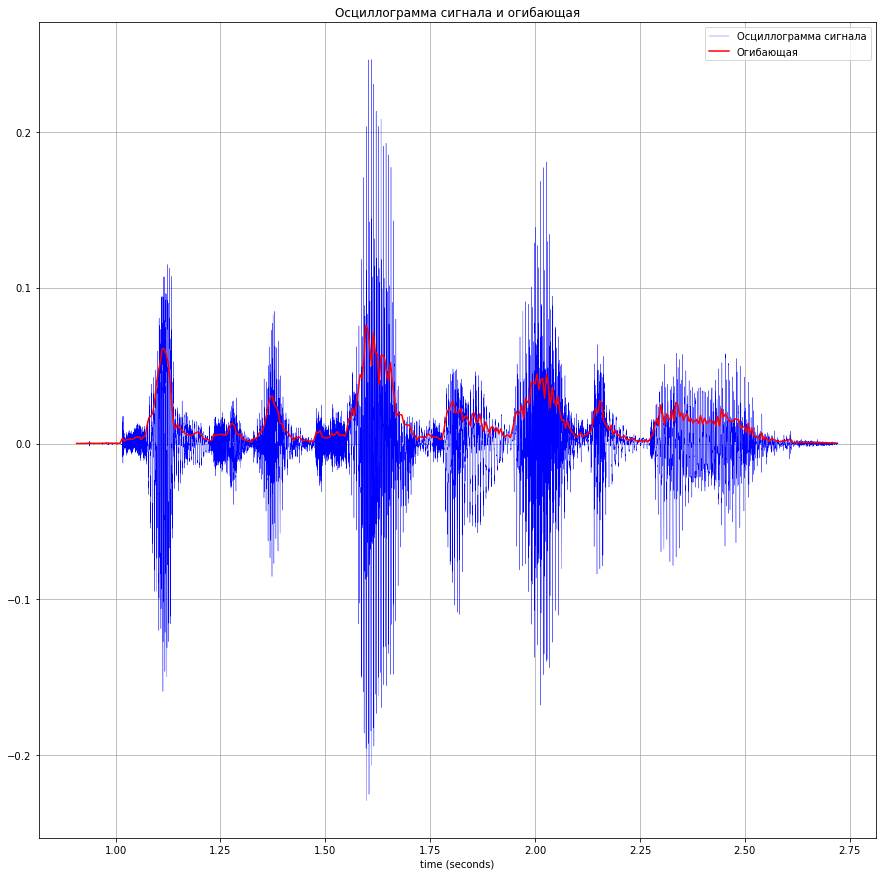

In [6]:
paintGraphics(x, N1, 60000, 20000)

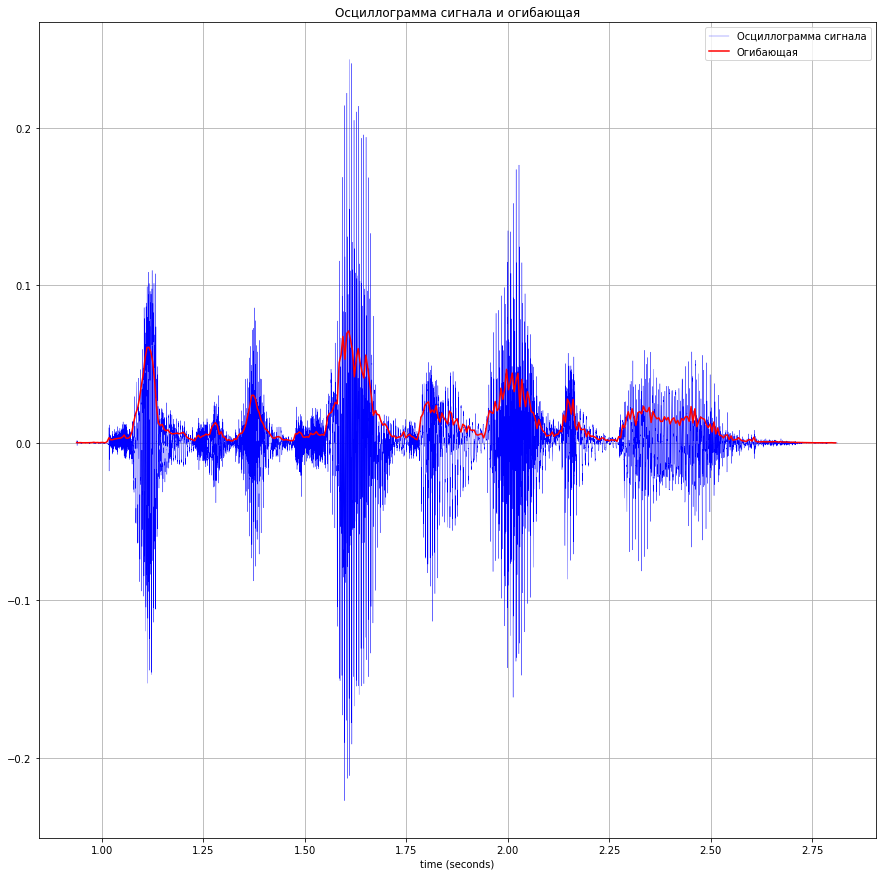

In [7]:
paintGraphics(y, N2, 45000, 15000)
Audio(data=y, rate=N2)

In [8]:
import soundfile
soundfile.write('out.wav', y, N2)